# Students performance

We are trying to predict the performance index

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading dataset

In [38]:
df = pd.read_csv('student_performance.csv')

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### Checking for missing values

In [11]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### Transforming column names into simple values

In [39]:
df.columns = ['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_practiced', 'performance_index']

In [15]:
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_practiced,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hours_studied               10000 non-null  int64  
 1   previous_scores             10000 non-null  int64  
 2   extracurricular_activities  10000 non-null  object 
 3   sleep_hours                 10000 non-null  int64  
 4   sample_question_practiced   10000 non-null  int64  
 5   performance_index           10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### Transforming objects to numeric values

In [40]:
df['extracurricular_activities'].value_counts()

No     5052
Yes    4948
Name: extracurricular_activities, dtype: int64

In [41]:
df['extracurricular_activities'] = df['extracurricular_activities'].replace({'Yes': 1, 'No': 0})

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hours_studied               10000 non-null  int64  
 1   previous_scores             10000 non-null  int64  
 2   extracurricular_activities  10000 non-null  int64  
 3   sleep_hours                 10000 non-null  int64  
 4   sample_question_practiced   10000 non-null  int64  
 5   performance_index           10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


## Exploratory Data Analisis

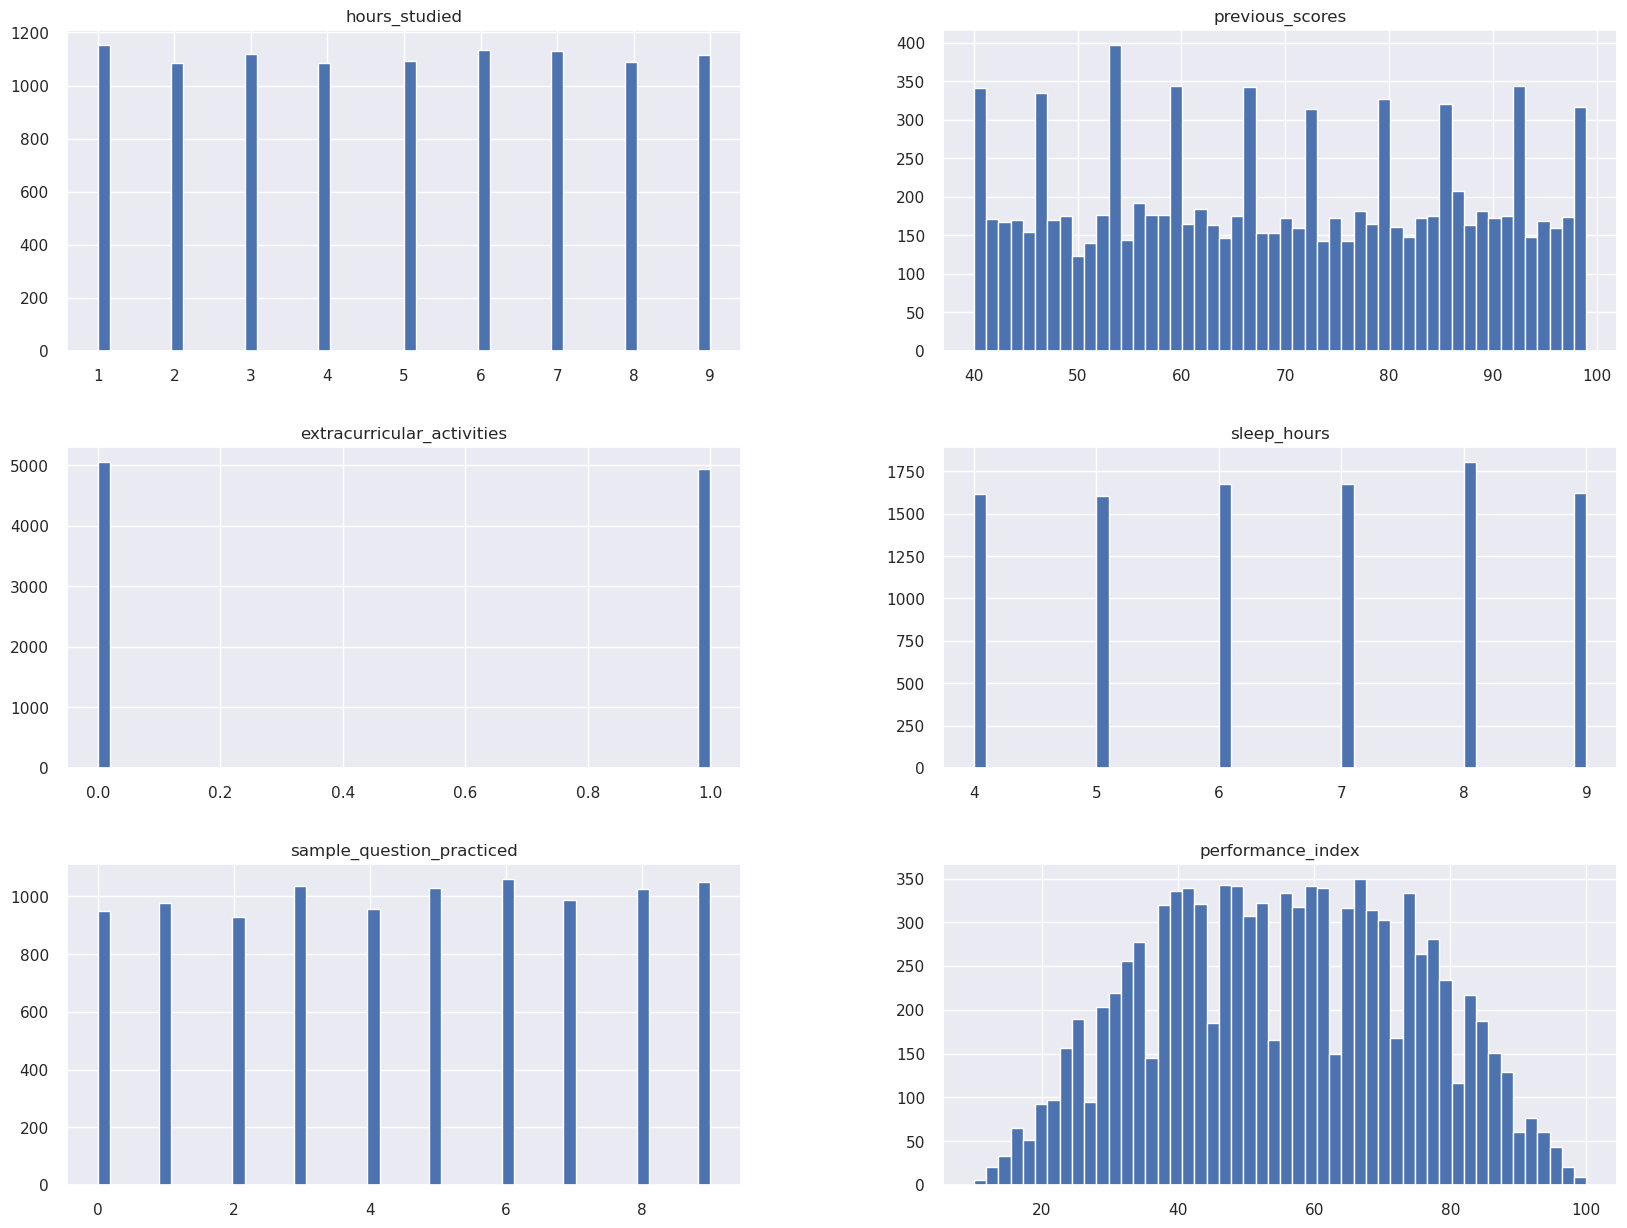

In [43]:
sns.set() # Aplies the seaborn style to all charts
df.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

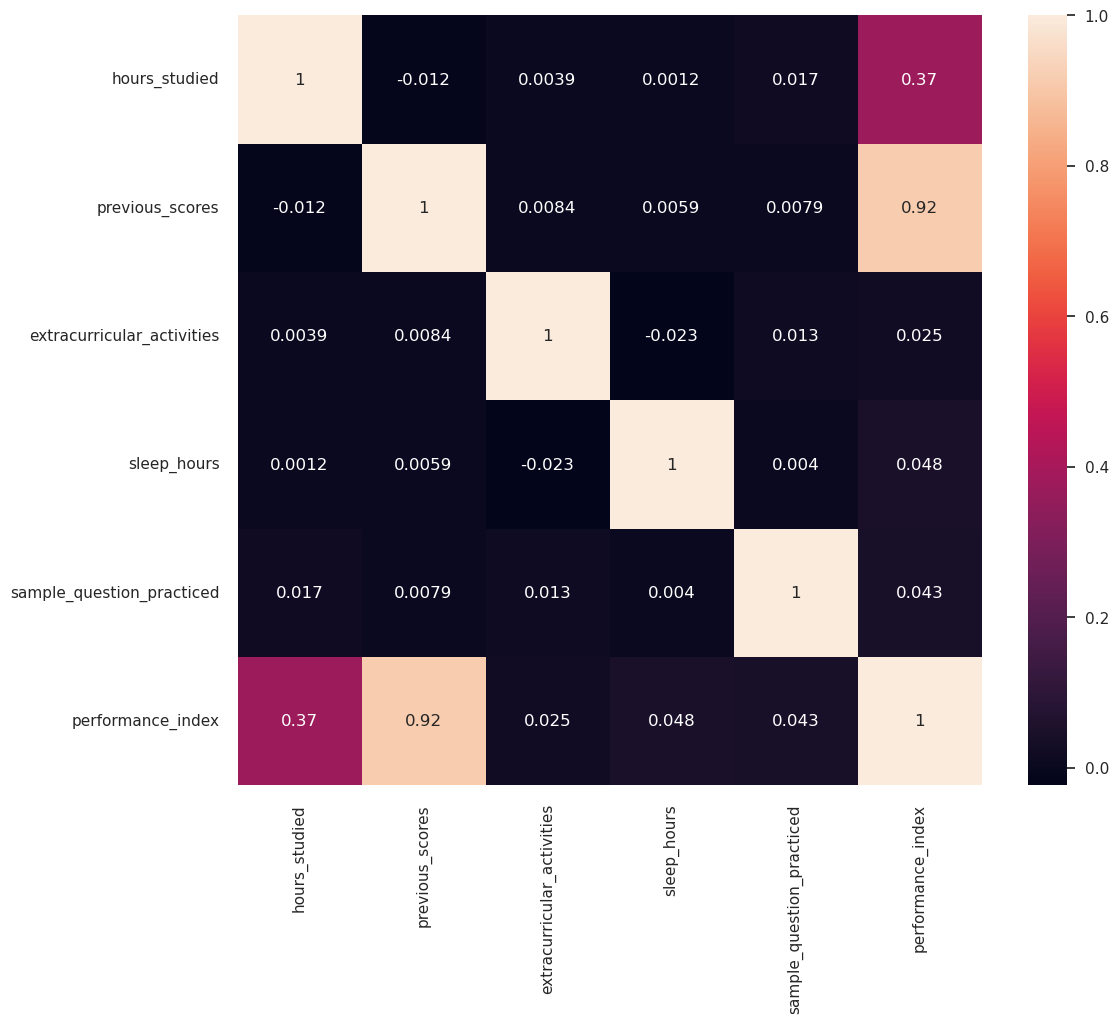

In [27]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr, annot=True)

### Findings
1. `previous_scores` has a high correlation with performance_index
2. `extracurricular_activities` it is a binary feature, which could impact the performance of the prediction model. 

### Bloxpots (Finding for outliers)

#### previous_scores

<Axes: >

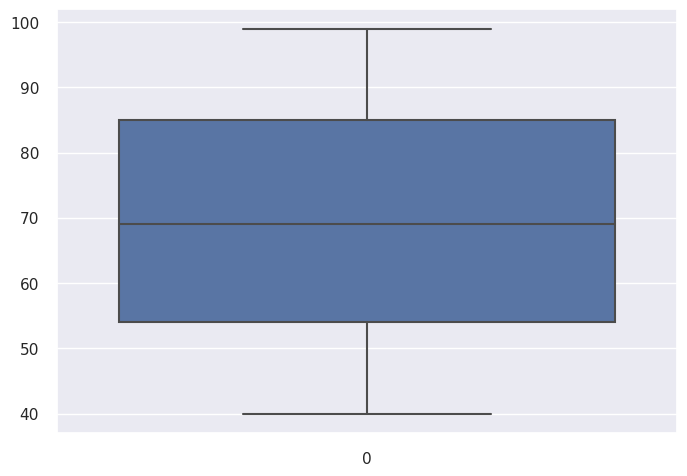

In [29]:
sns.boxplot(df['previous_scores'])

#### extracurricular_activities

<Axes: >

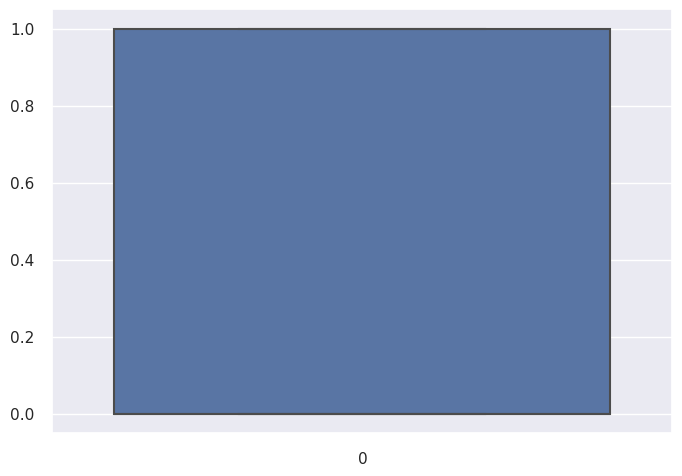

In [31]:
sns.boxplot(df['extracurricular_activities'])

## Creating a new dataset with important features

In [48]:
drop_features = ['hours_studied', 'sleep_hours', 'sample_question_practiced']
dependent_features = ['previous_scores', 'extracurricular_activities']
independent_feature = 'performance_index'

In [45]:
df = df.drop(drop_features, axis=1)

In [46]:
df.head()

,previous_scores,extracurricular_activities,performance_index
0,99,1,91.0
1,82,0,65.0
2,51,1,45.0
3,52,1,36.0
4,75,0,66.0


## Scatter Plot

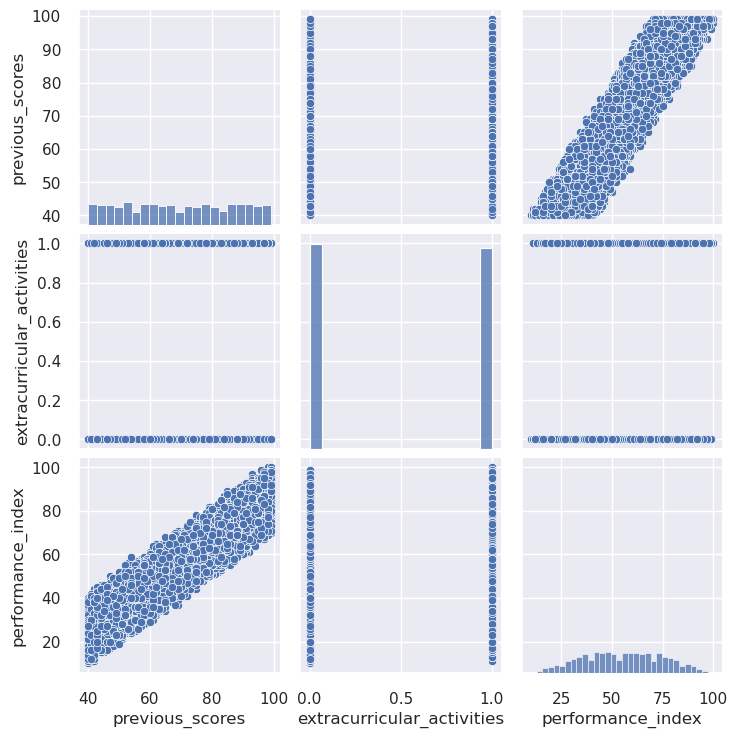

In [47]:
sns.pairplot(df)

## Traing Test Split

In [49]:
X=df[dependent_features]
y=df[independent_feature]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Feature selection based on correlation

In [55]:
X_train.corr()

,previous_scores,extracurricular_activities
previous_scores,1.000000,0.005473
extracurricular_activities,0.005473,1.000000


### Check for multicollinearity

<Axes: >

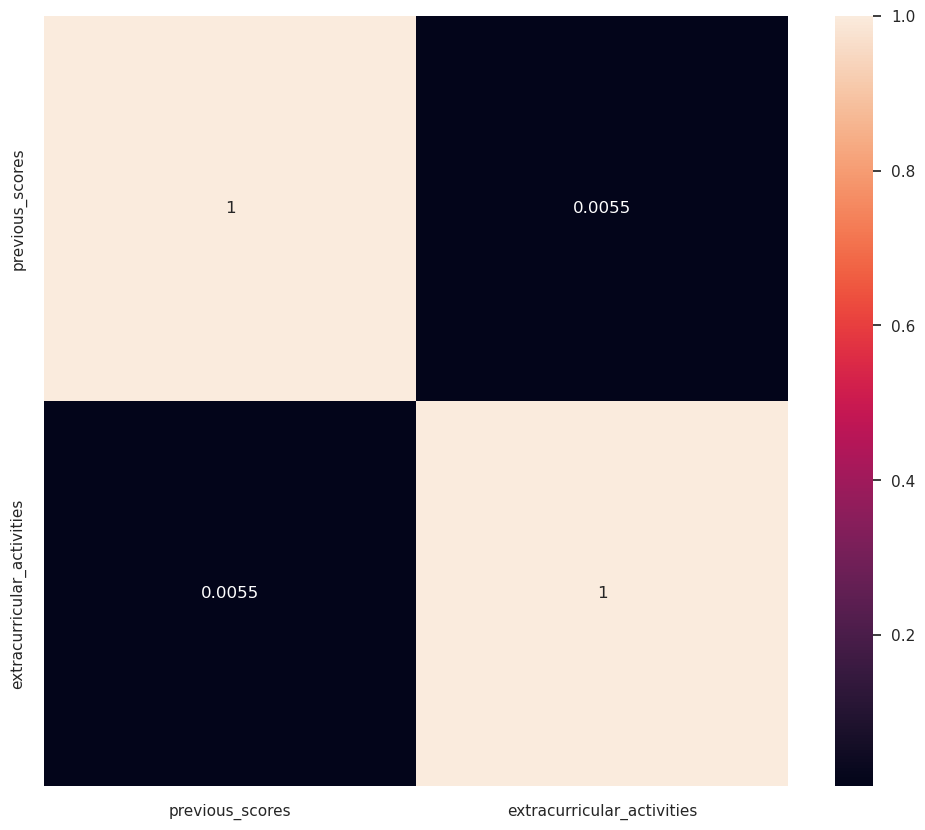

In [58]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [59]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
## Threshold--Domain Expertise
correlation(X_train, 0.90)

set()

**You can drop the features returned by the correlation function. Remember that threshold can be defined by product manager or domain expert**

## Model Training

### Standarization

In [67]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

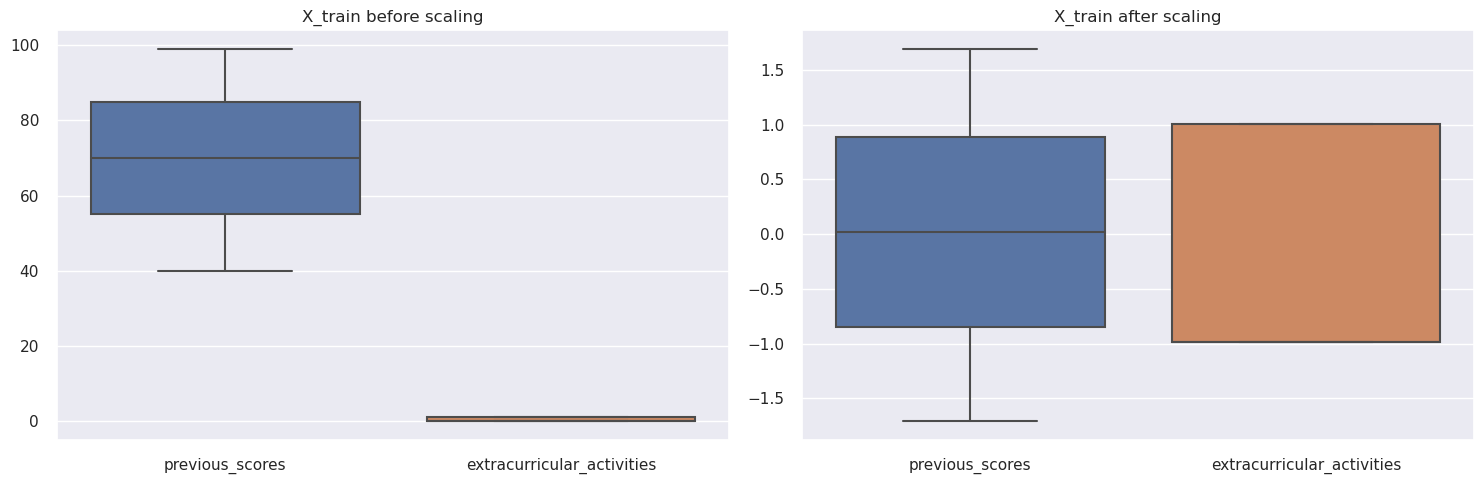

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title('X_train before scaling')

sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title('X_train after scaling')

plt.tight_layout()
plt.show()


### Model generation

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute Error  6.554779626777166
R2 Score  0.8393880881297053


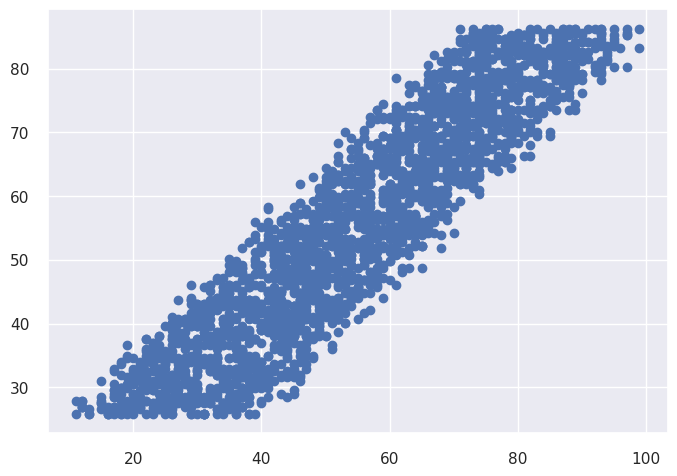

In [92]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("R2 Score ", score)

plt.scatter(y_test, y_pred)

### Lasso Regression

In [93]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute Error  6.578733347496486
R2 Score  0.8362630978511029


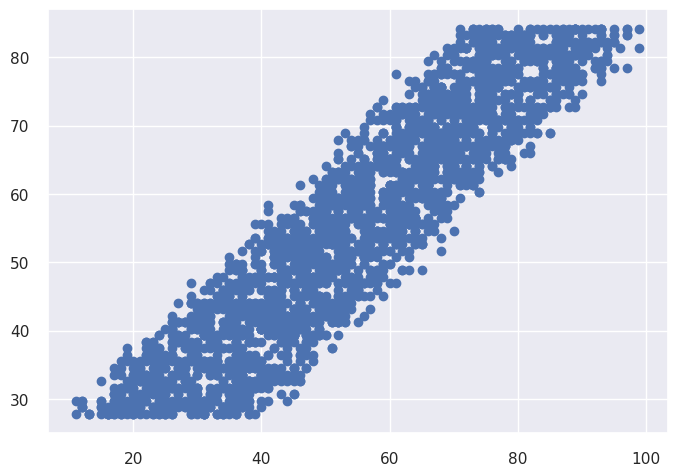

In [94]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("R2 Score ", score)

plt.scatter(y_test, y_pred)

### Ridge Regression

In [95]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute Error  6.554726025459077
R2 Score  0.8393877656551798


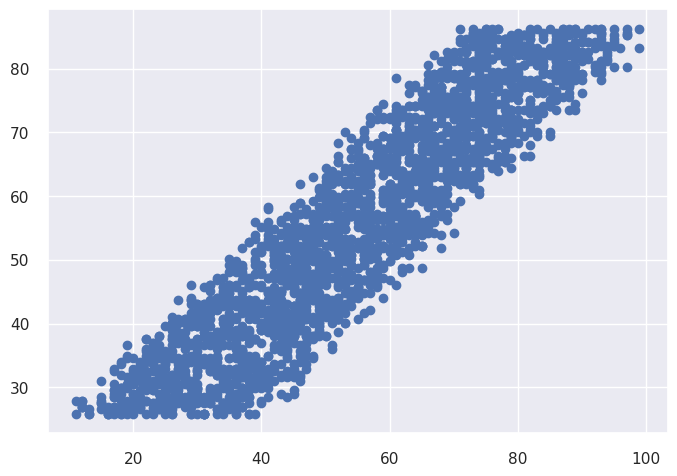

In [96]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("R2 Score ", score)

plt.scatter(y_test, y_pred)

### ElasticNet Regression

In [97]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute Error  7.996972631037712
R2 Score  0.734162126623793


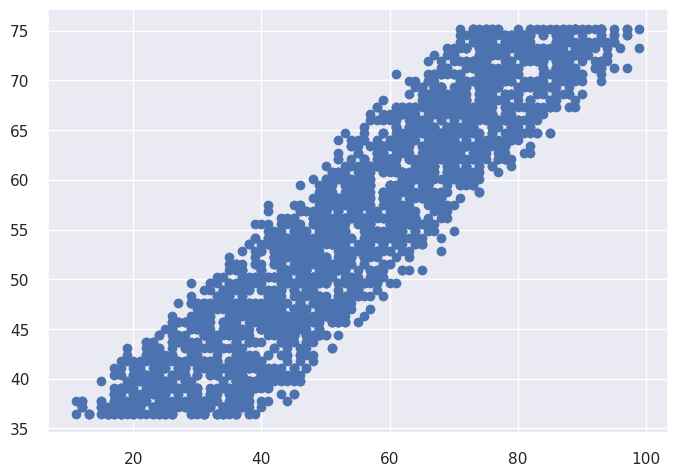

In [98]:
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)

y_pred = elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("R2 Score ", score)

plt.scatter(y_test, y_pred)